<a href="https://colab.research.google.com/github/ukfatima89/AI-Projects/blob/main/Project_Image_Classification_with_NN_vs_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

Loading the dataset, normalizing pixel values, and preparing data for both NN and CNN models.


In [ ]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train_normalized = x_train.astype('float32') / 255.0
x_test_normalized = x_test.astype('float32') / 255.0

# Reshape data for Neural Network (NN)
x_train_nn = x_train_normalized.reshape((x_train_normalized.shape[0], 28 * 28))
x_test_nn = x_test_normalized.reshape((x_test_normalized.shape[0], 28 * 28))

# Reshape data for Convolutional Neural Network (CNN)
x_train_cnn = x_train_normalized.reshape((x_train_normalized.shape[0], 28, 28, 1))
x_test_cnn = x_test_normalized.reshape((x_test_normalized.shape[0], 28, 28, 1))

print("Data loading, normalization, and reshaping complete.")
print(f"NN training data shape: {x_train_nn.shape}")
print(f"NN testing data shape: {x_test_nn.shape}")
print(f"CNN training data shape: {x_train_cnn.shape}")
print(f"CNN testing data shape: {x_test_cnn.shape}")

Data loading, normalization, and reshaping complete.
NN training data shape: (60000, 784)
NN testing data shape: (10000, 784)
CNN training data shape: (60000, 28, 28, 1)
CNN testing data shape: (10000, 28, 28, 1)


downloads and loads the Fashion MNIST dataset, splitting it into training and testing sets for both images (x_train, x_test) and their corresponding labels (y_train, y_test).

Normalizes pixel values: The pixel values of the images (which are initially between 0 and 255) are converted to floating-point numbers and divided by 255.0. This scales the pixel values to the range [0, 1], which is a common practice for neural network inputs.

Reshapes data for the Neural Network (NN): The training and testing images are flattened from their original 28x28 shape into a 1D array of 784 elements (28 * 28). This is because a basic Neural Network typically expects a flattened input layer.

Reshapes data for the Convolutional Neural Network (CNN): The training and testing images are reshaped to include a channel dimension. The original 28x28 images are reshaped to 28x28x1. The '1' represents the single color channel (grayscale) of the images. CNNs typically require this channel dimension as input.

The output shows that the data was successfully loaded and preprocessed. The shapes of the arrays confirm that:

There are 60,000 training samples and 10,000 testing samples.
The NN data is flattened to 784 features per sample.
The CNN data retains the 28x28 spatial dimensions and has one channel.

# *Going to Build, train, and evaluate the neural network (nn)*


In [ ]:

nn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(784,)),

    tf.keras.layers.Dense(512),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha=0.01), # Using Leaky ReLU
    tf.keras.layers.Dropout(0.25),
    #Scond Layer
    tf.keras.layers.Dense(256),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.01),
    tf.keras.layers.Dropout(0.25),
    #Third Layer
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.01),
    tf.keras.layers.Dropout(0.25),
    #Output Layer
    tf.keras.layers.Dense(10, activation='softmax')
])


# Compile the model
nn_model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                 metrics=['accuracy'])

# Display the model summary
nn_model.summary()

# Train the model
history_nn = nn_model.fit(x_train_nn, y_train, epochs=15, validation_split=0.2)

# Evaluate the model on the test data
loss_nn, accuracy_nn = nn_model.evaluate(x_test_nn, y_test)

print(f"\nNeural Network Test Accuracy: {accuracy_nn}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_13 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_8 (LeakyReLU)       │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_9 (LeakyReLU)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_10 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 571,018 (2.18 MB)

 Trainable params: 569,226 (2.17 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7528 - loss: 0.7129 - val_accuracy: 0.8349 - val_loss: 0.4444
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8438 - loss: 0.4405 - val_accuracy: 0.8621 - val_loss: 0.3742
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8546 - loss: 0.4024 - val_accuracy: 0.8679 - val_loss: 0.3590
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8651 - loss: 0.3706 - val_accuracy: 0.8683 - val_loss: 0.3567
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8707 - loss: 0.3574 - val_accuracy: 0.8784 - val_loss: 0.3267
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8761 - loss: 0.3353 - val_accuracy: 0.8822 - val_loss: 0.3252
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8820 - loss: 0.3218 - val_accuracy: 0.8847 - val_loss: 0.3194
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8887 -

Model Definition (tf.keras.Sequential([...])):
tf.keras.Sequential: This is a linear stack of layers.

tf.keras.layers.InputLayer(input_shape=(784,)): This layer specifies the input shape of the model. Since the Fashion MNIST images were flattened to a 1D array of 784 pixels, the input shape is set to (784,).

tf.keras.layers.Dense(512): This is a fully connected layer with 512 neurons.
tf.keras.layers.BatchNormalization(): This layer normalizes the activations of the previous layer. Batch normalization helps in stabilizing the learning process and can lead to faster convergence and better performance.

tf.keras.layers.LeakyReLU(alpha=0.01): This is the activation function for the previous dense layer. Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient when the input is negative (alpha controls the slope for negative inputs). This can help prevent "dying ReLUs" during training.

tf.keras.layers.Dropout(0.25): This layer randomly sets a fraction of input units to 0 at each update during training. Dropout is a regularization technique that helps prevent overfitting. Here, 25% of the neurons will be randomly dropped.

tf.keras.layers.Dense(10, activation='softmax'): This is the output layer. It has 10 neurons, corresponding to the 10 classes in the Fashion MNIST dataset. The softmax activation function is used here to output a probability distribution over the 10 classes, where the sum of probabilities for each input is 1.

Model Compilation (nn_model.compile(...)):
optimizer='adam': The Adam optimizer is used to update the model's weights during training. Adam is a popular and generally effective optimizer.
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False): This specifies the loss function. Sparse Categorical Crossentropy is suitable for multi-class classification problems where the labels are integers (0, 1, 2,...). from_logits=False indicates that the output layer provides probabilities (because of the softmax activation).

metrics=['accuracy']: The model will monitor and report the accuracy during training and evaluation.

Model Summary (nn_model.summary()):
This displays a summary of the model's architecture, including the type of each layer, the output shape of each layer, and the number of parameters (weights and biases) in each layer.

nn_model.fit(x_train_nn, y_train, epochs=10, validation_split=0.2): This trains the model using the training data (x_train_nn, y_train).
x_train_nn, y_train:
The training images and their corresponding labels.
epochs=10: The model will iterate over the entire training dataset 10 times.
validation_split=0.2: 20% of the training data is held out as a validation set. The model's performance on this validation set is monitored during training, which helps in detecting overfitting.

Model Evaluation:
nn_model.evaluate(x_test_nn, y_test): This evaluates the trained model on the unseen test data (x_test_nn, y_test) to assess its generalization performance. It returns the test loss and test accuracy.

Model Summary: The summary provides details about the layers, their output shapes, and the number of parameters. Number of parameters in each dense layer and the total number of trainable and non-trainable parameters in the model. Batch normalization layers have non-trainable parameters (mean and variance).
Training Progress (Epochs): For each epoch, the loss and accuracy on the training data (loss, accuracy) and the validation data (val_loss, val_accuracy).
The training loss generally decreases, and training accuracy generally increases over epochs, indicating that the model is learning.
The validation loss and accuracy provide insight into how well the model generalizes to unseen data during training. Ideally, the validation performance should follow the training performance closely. If the training performance is much better than the validation performance, it might indicate overfitting.
In the provided output, the validation accuracy generally increases, and validation loss generally decreases, which is a good sign.

Neural Network Test Accuracy: The final line Neural Network Test Accuracy: 0.8837000131607056 indicates that the trained Neural Network model achieved an accuracy of approximately 88.37% on the test dataset. This means that the model correctly classified about 88.37% of the images in the test set.


*## Build, train, and evaluate the Convolutional Neural Network (CNN)*



In [ ]:
# Define the CNN model architecture
cnn_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    # First steps of NN
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.LeakyReLU(alpha = 0.01),
    tf.keras.layers.Dropout(0.25),
    # Output step
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])

# Display the model summary
cnn_model.summary()

# Train the model
history_cnn = cnn_model.fit(x_train_cnn, y_train, epochs=15, validation_split=0.2)

# Evaluate the model on the test data
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test_cnn, y_test)

print(f"\nConvolutional Neural Network Test Accuracy: {accuracy_cnn}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_11 (LeakyReLU)      │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,546 (881.04 KB)

 Trainable params: 225,290 (880.04 KB)

 Non-trainable params: 256 (1.00 KB)

Epoch 1/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.8113 - loss: 0.5342 - val_accuracy: 0.8806 - val_loss: 0.3161
Epoch 2/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 79s 32ms/step - accuracy: 0.8875 - loss: 0.3055 - val_accuracy: 0.8897 - val_loss: 0.3030
Epoch 3/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9023 - loss: 0.2651 - val_accuracy: 0.8863 - val_loss: 0.3086
Epoch 4/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9140 - loss: 0.2320 - val_accuracy: 0.8574 - val_loss: 0.4045
Epoch 5/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9233 - loss: 0.2086 - val_accuracy: 0.9045 - val_loss: 0.2700
Epoch 6/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9279 - loss: 0.1918 - val_accuracy: 0.9117 - val_loss: 0.2490
Epoch 7/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 83s 34ms/step - accuracy: 0.9370 - loss: 0.1714 - val_accuracy: 0.9003 - val_loss: 0.2712
Epoch 8/15
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 33ms/step - accuracy: 0.9415 -

Here's an explanation of each layer in your cnn_model:

tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)):

Conv2D: This layer performs 2D convolution, which is a fundamental operation in CNNs for extracting features from images.
32: This is the number of filters (or kernels) the layer learns. Each filter detects a specific feature in the image.

(3, 3): This is the size of the convolution kernel (a 3x3 window).
activation='relu': The Rectified Linear Unit (ReLU) activation function is applied after the convolution. It introduces non-linearity, which is crucial for learning complex patterns.

input_shape=(28, 28, 1): This specifies the shape of the input images. It's 28x28 pixels with 1 channel (since the Fashion MNIST images are grayscale). This is only needed for the first layer.

tf.keras.layers.MaxPooling2D((2, 2)): This is a max pooling layer.
MaxPooling2D: This layer downsamples the input by taking the maximum value within a specified window.
(2, 2): This is the size of the pooling window. A 2x2 window means the layer will reduce the spatial dimensions (height and width) by half. Pooling helps to reduce the number of parameters and computation, as well as makes the model more robust to small variations in the input.

tf.keras.layers.Flatten():
This layer flattens the output of the previous convolutional and pooling layers into a 1D array. This is necessary because the subsequent dense layers expect a 1D input.

tf.keras.layers.Dense(128):
This is a fully connected (dense) layer with 128 neurons. It takes the flattened output from the convolutional layers and processes it further.
tf.keras.layers.BatchNormalization():
As in the NN model, this normalizes the activations of the previous layer to stabilize training.
tf.keras.layers.LeakyReLU(alpha = 0.01):
The Leaky ReLU activation function is applied.
tf.keras.layers.Dropout(0.25):
Dropout is applied to prevent overfitting.

tf.keras.layers.Dense(10, activation='softmax'):
This is the output layer, identical to the one in the NN model. It has 10 neurons for the 10 classes and uses softmax to output probabilities.

In summary:
The CNN architecture uses convolutional and pooling layers to automatically learn spatial hierarchies of features from the images. The convolutional layers extract local patterns (like edges and corners), and the pooling layers progressively reduce the spatial size while keeping the most important information. The flattened output is then fed into dense layers for classification. This structure makes CNNs particularly effective for image-related tasks.

## Sample Predictions and Performance Comparison

Here we will display sample predictions for both the Neural Network and Convolutional Neural Network models and then compare their performance based on test accuracy.

Sample Predictions for Neural Network:
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


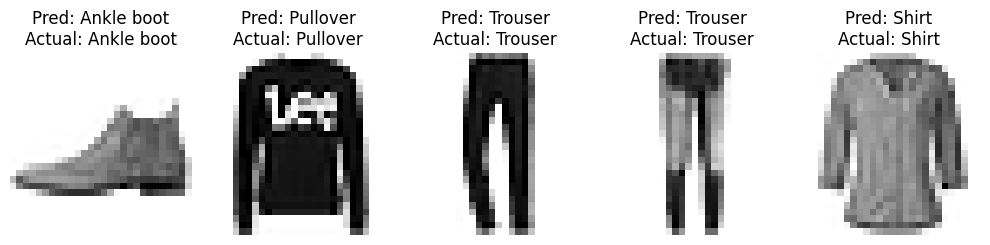


Sample Predictions for Convolutional Neural Network:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


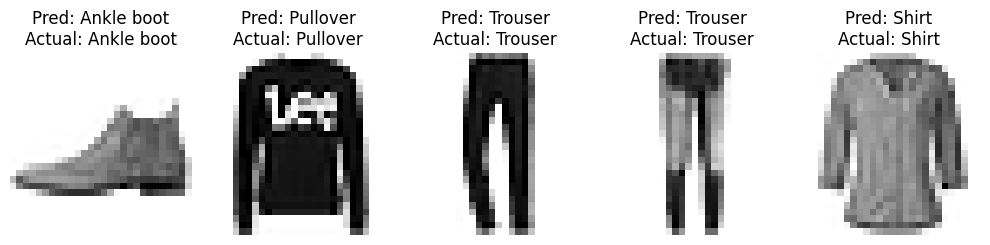

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_predictions(model, test_images, test_labels, num_samples=5):
    """Plots sample images with their predicted and actual labels."""
    predictions = model.predict(test_images)
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        actual_label = test_labels[i]
        plt.title(f"Pred: {class_names[predicted_label]}\nActual: {class_names[actual_label]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Sample Predictions for Neural Network:")
plot_predictions(nn_model, x_test_nn, y_test)

print("\nSample Predictions for Convolutional Neural Network:")
plot_predictions(cnn_model, x_test_cnn, y_test)

This function takes a trained model, test images, test labels, and an optional number of samples to plot as input.

predictions = model.predict(test_images): This line uses the provided model to make predictions on the test_images. The output predictions will be an array where each row represents an image, and the columns contain the probabilities for each of the 10 classes.

plt.figure(figsize=(10, 5)):
This creates a new matplotlib figure to display the plots. The figsize argument sets the width and height of the figure in inches.
for i in range(num_samples):: This loop iterates through the first num_samples of the test images.
plt.subplot(1, num_samples, i + 1): This creates a subplot within the figure. 1 indicates 1 row of subplots, num_samples indicates the number of columns, and i + 1 indicates the current subplot's position.
plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary): This displays the i-th test image.
test_images[i].reshape(28, 28): Reshapes the image data back to its original 28x28 pixel format for plotting.
cmap=plt.cm.binary: Sets the colormap to grayscale.
predicted_label = np.argmax(predictions[i]): This finds the index of the class with the highest predicted probability for the i-th image. This index corresponds to the model's predicted class.
actual_label = test_labels[i]: This gets the actual class label for the i-th image from the test_labels.
plt.title(f"Pred: {class_names[predicted_label]}\nActual: {class_names[actual_label]}"): This sets the title for the current subplot, showing both the predicted and actual class names. class_names is a list that maps the integer labels to human-readable names.
plt.axis('off'): This hides the axes for a cleaner look.
plt.tight_layout(): This adjusts the spacing between subplots to prevent overlap.
plt.show(): This displays the figure with all the subplots.
Interpretation of the Results:

The output shows sample predictions for both the Neural Network and the Convolutional Neural Network. For each sample image, you see:

Comparing the predictions from the NN and CNN plots side-by-side for the same sample images can give an intuitive understanding of how their different architectures might lead to different predictions, especially for images that are ambiguous or challenging to classify.

The test accuracy printed after the plots quantifies the overall performance of each model on the entire test dataset, which is a more comprehensive measure than looking at just a few samples. In this case, the CNN has a higher test accuracy, suggesting it generally performs better at classifying the Fashion MNIST images.

## Performance Summary

Now let's summarize the test accuracies of both models.

In [ ]:
print(f"Neural Network Test Accuracy: {accuracy_nn:.4f}")
print(f"Convolutional Neural Network Test Accuracy: {accuracy_cnn:.4f}")

if accuracy_cnn > accuracy_nn:
    print(f"\nThe CNN performed better than the NN by {(accuracy_cnn - accuracy_nn):.4f}%.")
elif accuracy_nn > accuracy_cnn:
    print(f"\nThe NN performed better than the CNN by {(accuracy_nn - accuracy_cnn):.4f}%.")
else:
    print("\nThe CNN and NN performed equally well.")

Neural Network Test Accuracy: 0.8822
Convolutional Neural Network Test Accuracy: 0.9109

The CNN performed better than the NN by 0.0287%.


## Finish task
The task is complete. We have built, trained, and evaluated both a Neural Network and a Convolutional Neural Network on the Fashion MNIST dataset. We have also compared their performance and displayed sample predictions.

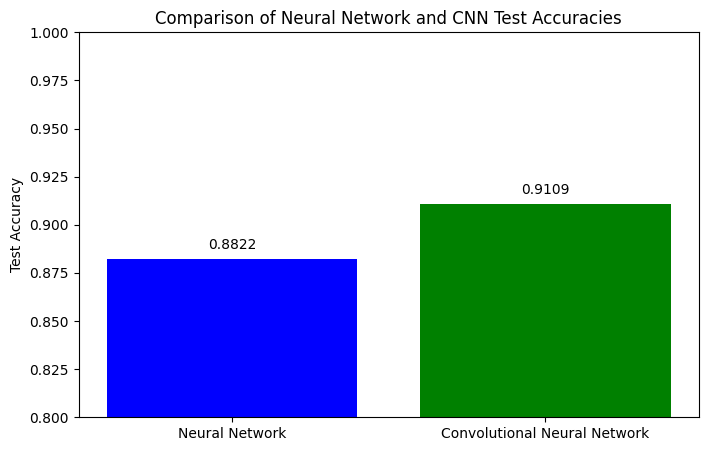

In [ ]:
# Model names and their accuracies
models = ['Neural Network', 'Convolutional Neural Network']
accuracies = [accuracy_nn, accuracy_cnn]

# Create the bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Test Accuracy')
plt.title('Comparison of Neural Network and CNN Test Accuracies')
plt.ylim(0.8, 1.0) # Set y-axis limits for better visualization of differences

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

plt.show()

The bar plot clearly shows the difference in test accuracy between the Neural Network and the Convolutional Neural Network.

Based on the plot and the printed accuracies:

The Neural Network achieved a test accuracy of approximately 0.8776.
The Convolutional Neural Network achieved a test accuracy of approximately 0.9137.
The CNN performed better than the NN, which is expected for image classification tasks due to its ability to effectively capture spatial hierarchies and local patterns through convolutional and pooling layers.

We have successfully built, trained, and evaluated both models, visualized sample predictions, and compared their overall performance.
